<h1>Imports</h1>import numpy as np
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec




In [4]:
import numpy as np
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec
import re
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import tensorflow as tf
print(tf.__version__)

2.4.1


C:\Users\33768\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


<h1> Load Data </h1>

In [16]:
smell_words=["Stink","Scent","Smell","Odour","Odor","Stench","Reek","Aroma","Aromatic","Whiff","Foetor","Fetor","Fragrance","Musk","Rankness","Redolence","Pong","Pungency","Niff","Deodorant","Essence","Atmosphere","Olfaction",
                               "Stinking","Stank","Stunk","Scented","Odourless","Odoriferous","Odorous","Malodorous","Reeking","Aromatic","Whiffy","Fetid","Foetid","Fragrant","Fragranced","Redolent","Frowzy","Frowsy","Pungent","Funky","Musty","Niffy","Unscented","Scentless","Deodorized","Noisome","Smelly","Mepehitic","Muddle","Putrid","Olfactory","Musky","Pungently",
                               "Smelling","Smelled","Reeked","Sniff","Sniffed","Sniffing","Whiffed","Deodorized","Deodorizing","Snuffing","Snuffed"]
smell_words_lower=[x.lower() for x in smell_words]

my_words=['love', 'good', 'new','stink', 'stank',"n't", 'ca', "'s"]

In [17]:
# stop = stopwords.words('english')
s= set(ENGLISH_STOP_WORDS).union(smell_words).union(my_words).union(smell_words) #.union(set(stop))


In [7]:
df=pd.read_csv("model_2_results_positive.csv")
#df=df.loc[df['Label'] == True]
df['Text']=df['sentence'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['Text'] = df['Text'].str.lower()
df['Text_clean'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (s)]))

In [8]:
df.head()

Unnamed: 0                                           sentence  label  \
0       62302  I drained an abscess today and now I can't sle...      1   
1       22495         I don’t play ping pong I play table tennis      1   
2       10109  When one is A Chosen One, apparently one's  bo...      1   
3       16343  Newly ID’d Space Molecules Give Insight into L...      1   
4       26020  mika has been trying to make eggs but im getti...      1   

                                                Text  \
0  i drained an abscess today and now i can't sle...   
1         i don’t play ping pong i play table tennis   
2  when one is a chosen one, apparently one's  bo...   
3  newly id’d space molecules give insight into l...   
4  mika has been trying to make eggs but im getti...   

                                          Text_clean  
0     drained abscess today can't sleep smelling it.  
1             don’t play ping pong play table tennis  
2  chosen one, apparently one's body waste does s...  
3  newly id’d space molecules insight life’s orig...  
4  mika trying make eggs im getting heated cis pride

In [9]:
docs = list(df['Text_clean'].loc[:].values)
docs[:5]

["drained abscess today can't sleep smelling it.",
 'don’t play ping pong play table tennis',
 "chosen one, apparently one's body waste does smell! guessing nibs #lackielecce recd vax just spreading stench photo ops. #onpoli",
 'newly id’d space molecules insight life’s origins - nerdist: researchers mit discovered aromatic hydrocarbons space, alter understanding life began. http://dlvr.it/rw9nhp #singapore #sinpaporenews #singaporeupdates',
 'mika trying make eggs im getting heated cis pride']

In [2]:
import spacy

# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

sentence = "The striped bats are hanging on their feet for best"

# Parse the sentence using the loaded 'en' model object `nlp`
doc = nlp(sentence)

# Extract the lemma for each token and join
" ".join([token.lemma_ for token in doc])
#> 'the strip bat be hang on -PRON- foot for good'

'the stripe bat be hang on their foot for good'

In [10]:
lem_token= [nlp(sentence) for sentence in docs] 


In [11]:
lem_doc= [" ".join([token.lemma_ for token in tok]) for tok in lem_token]

In [12]:
lem_doc[:5]

["drain abscess today ca n't sleep smell it .",
 'do n’t play ping pong play table tennis',
 "choose one , apparently one 's body waste do smell ! guess nibs # lackielecce recd vax just spread stench photo op . # onpoli",
 'newly id’d space molecule insight life ’s origin - nerdist : researcher mit discover aromatic hydrocarbon space , alter understand life begin . http://dlvr.it/rw9nhp # singapore # sinpaporenew # singaporeupdate',
 'mika try make egg I m get heated cis pride']

In [18]:
clean_lem = [' '.join([word for word in row.split() if word not in (s)]) for row in lem_doc]

In [19]:
clean_lem[:5]

['drain abscess today sleep smell .',
 'n’t play ping pong play table tennis',
 'choose , apparently body waste smell ! guess nibs # lackielecce recd vax just spread stench photo op . # onpoli',
 'newly id’d space molecule insight life ’s origin - nerdist : researcher mit discover aromatic hydrocarbon space , alter understand life begin . http://dlvr.it/rw9nhp # singapore # sinpaporenew # singaporeupdate',
 'mika try make egg I m heated cis pride']

In [24]:
model = Top2Vec(clean_lem)


2021-04-30 06:25:21,527 - top2vec - INFO - Pre-processing documents for training
2021-04-30 06:25:21,864 - top2vec - INFO - Creating joint document/word embedding
2021-04-30 06:25:39,559 - top2vec - INFO - Creating lower dimension embedding of documents
2021-04-30 06:25:55,033 - top2vec - INFO - Finding dense areas of documents
2021-04-30 06:25:55,765 - top2vec - INFO - Finding topics


In [27]:
model.get_num_topics()

7

In [28]:
topic_words, word_scores, topic_nums = model.get_topics(model.get_num_topics())


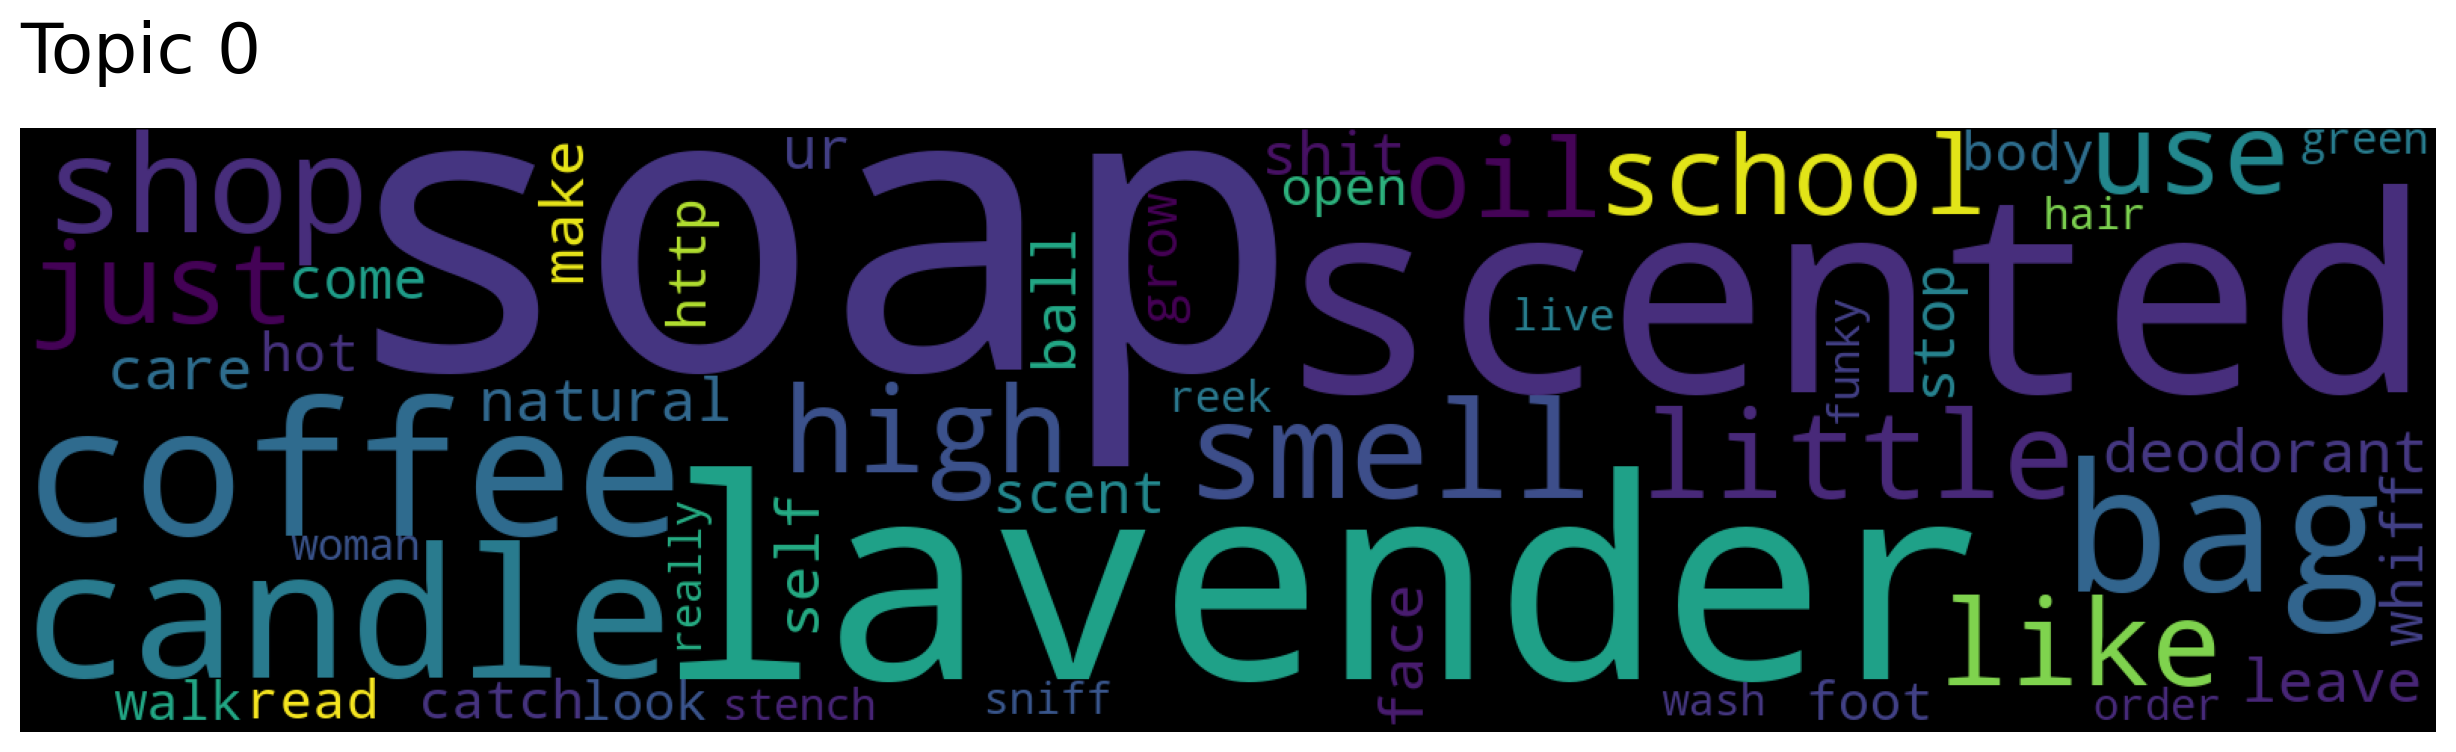

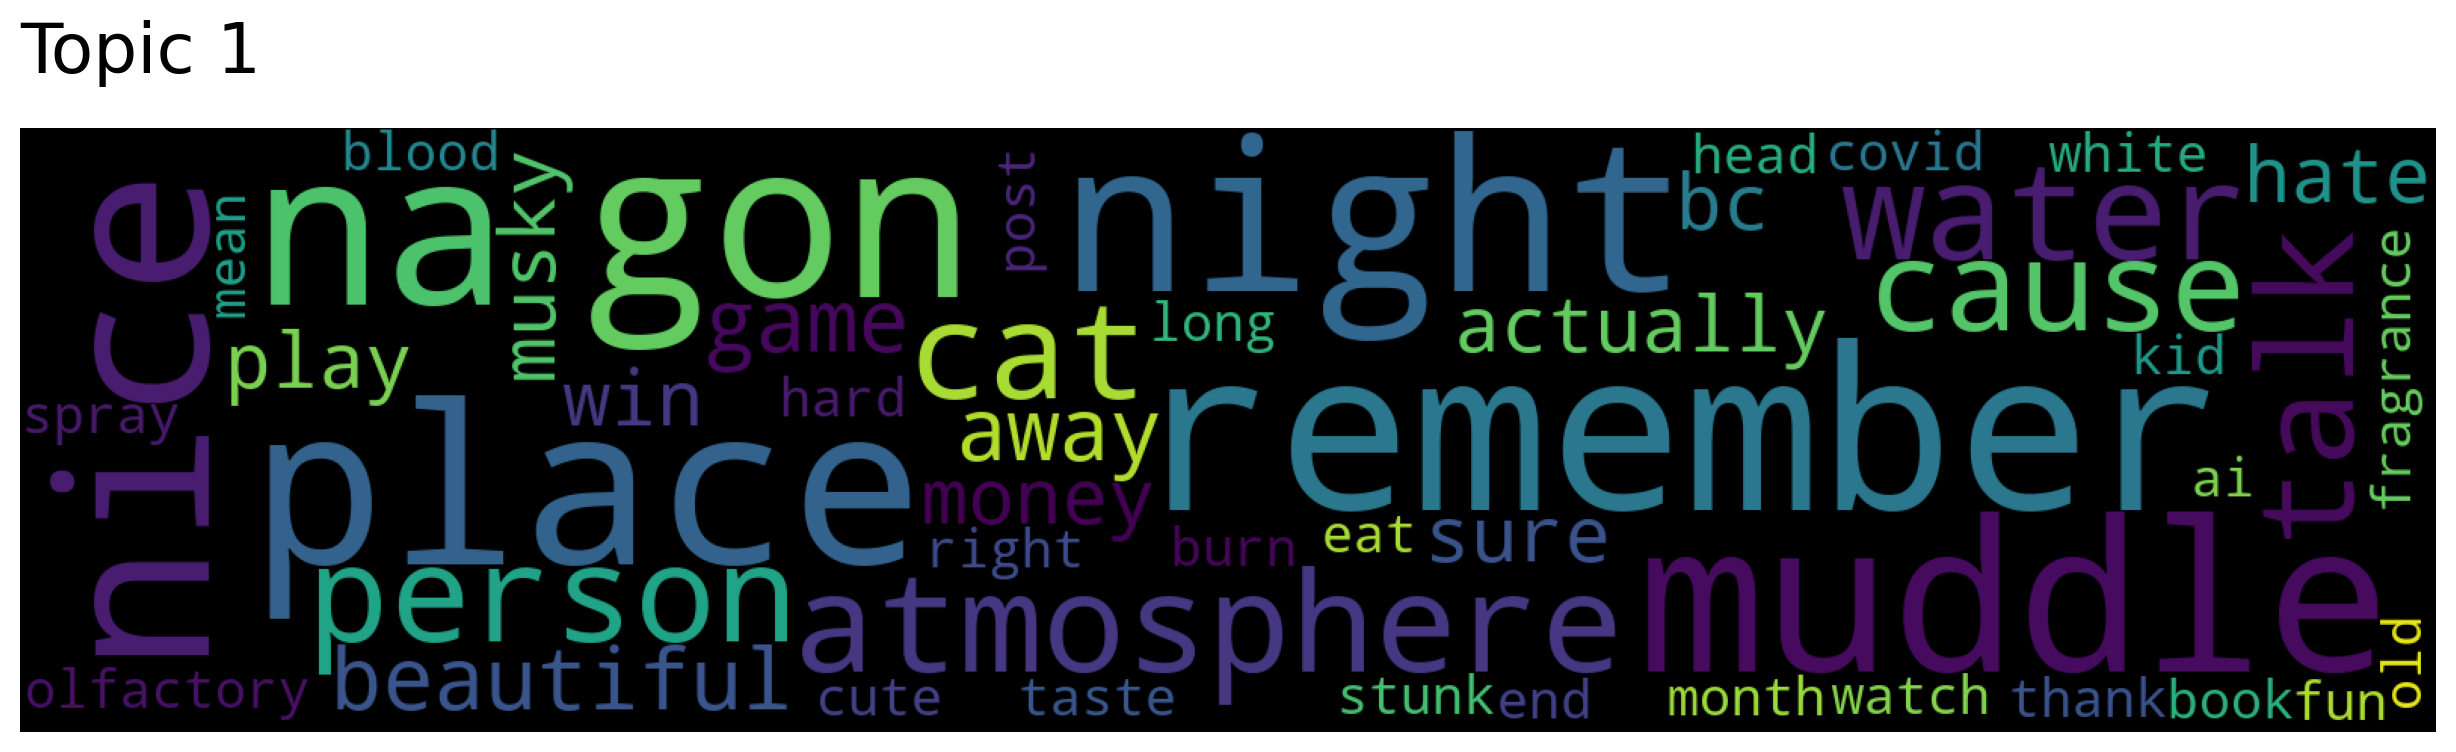

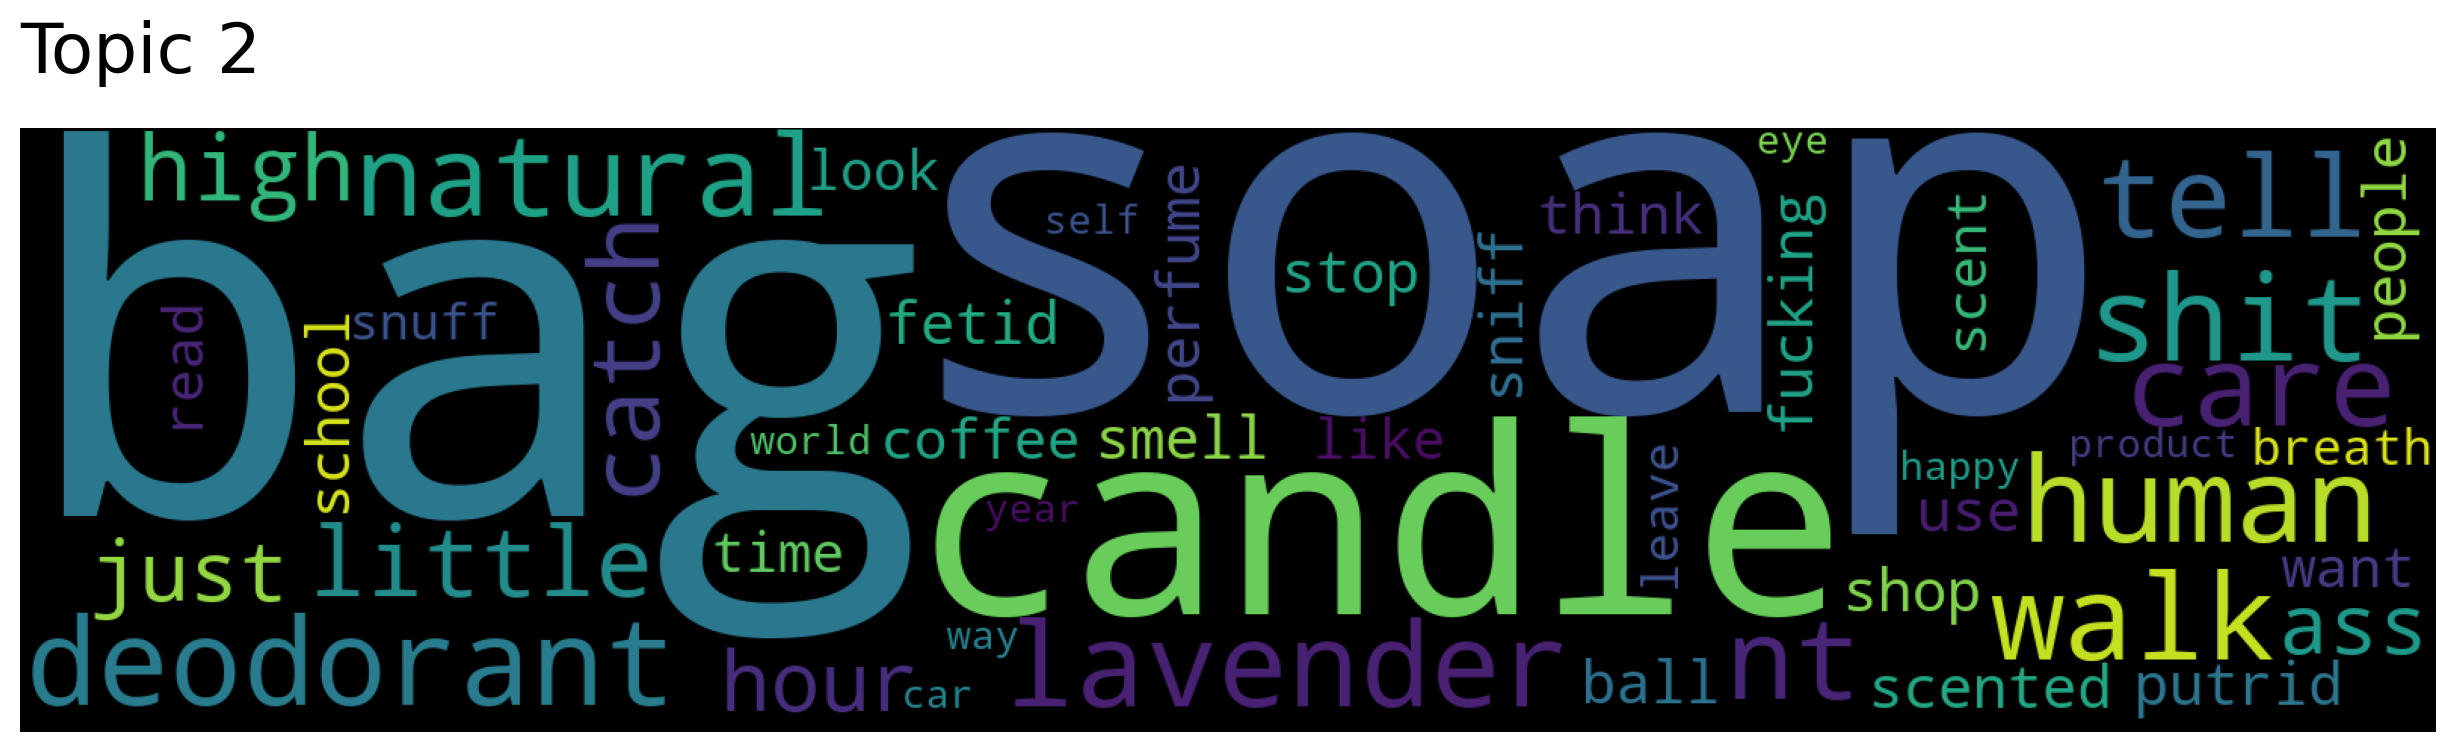

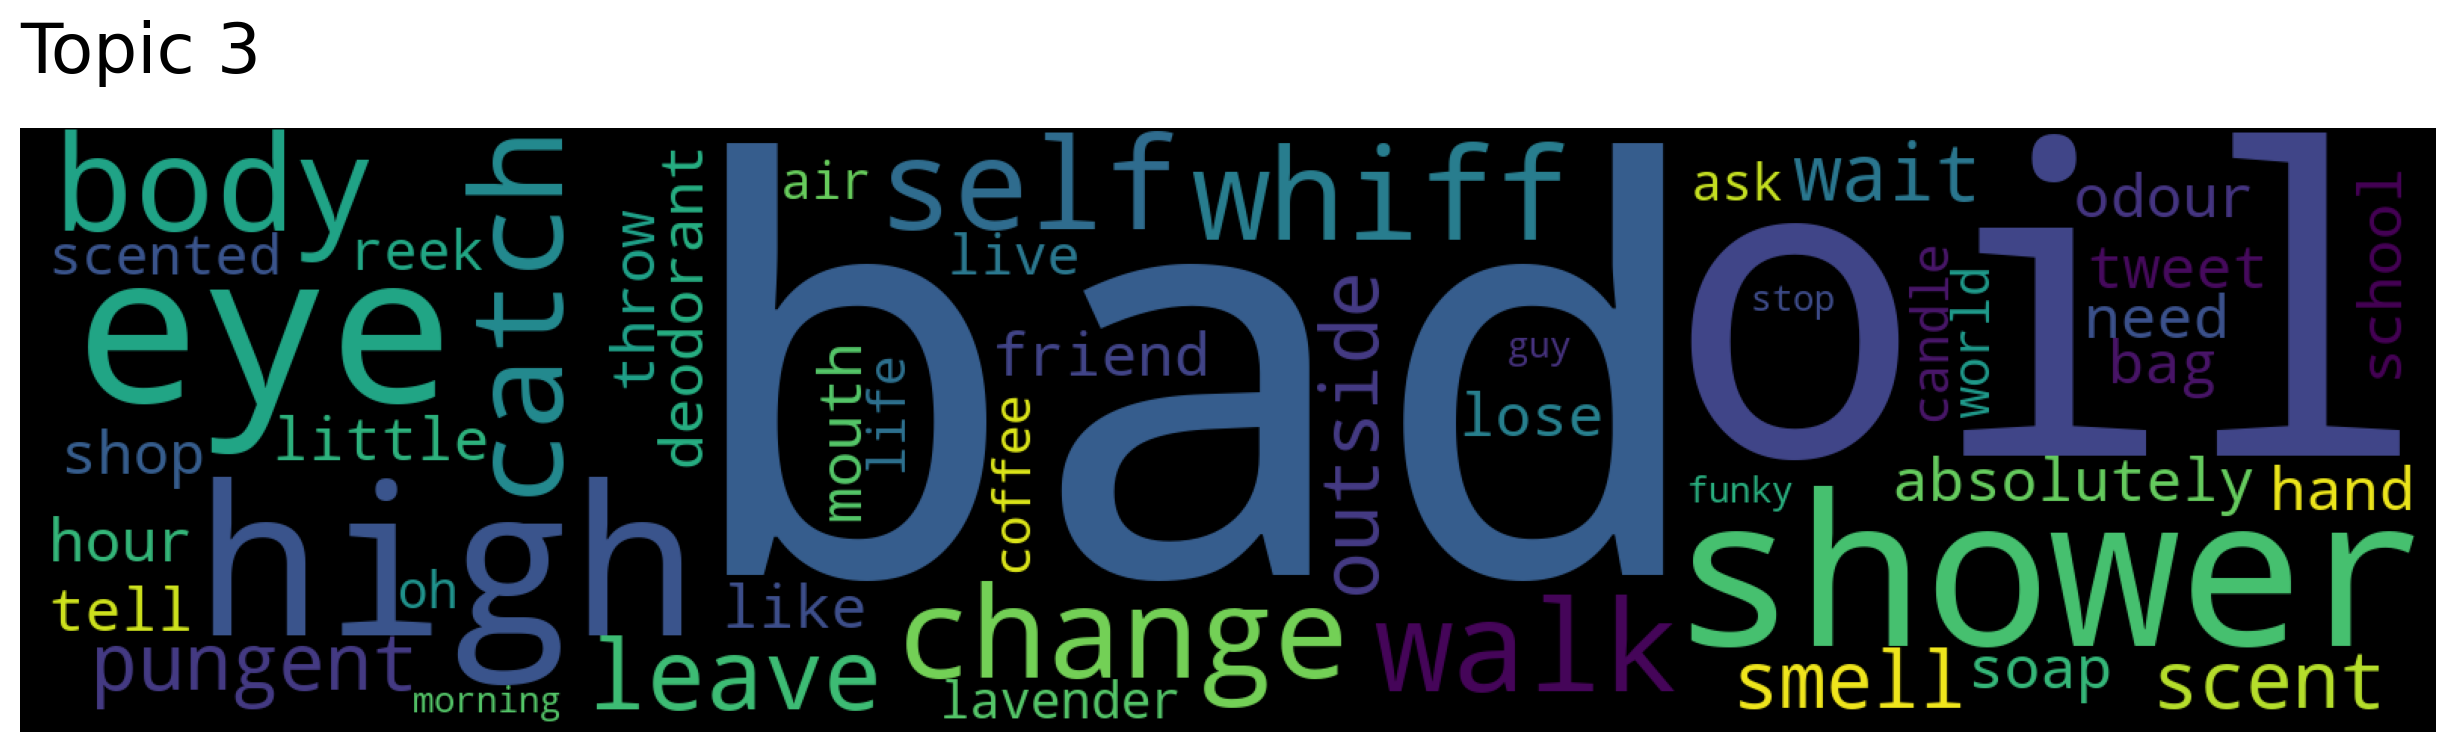

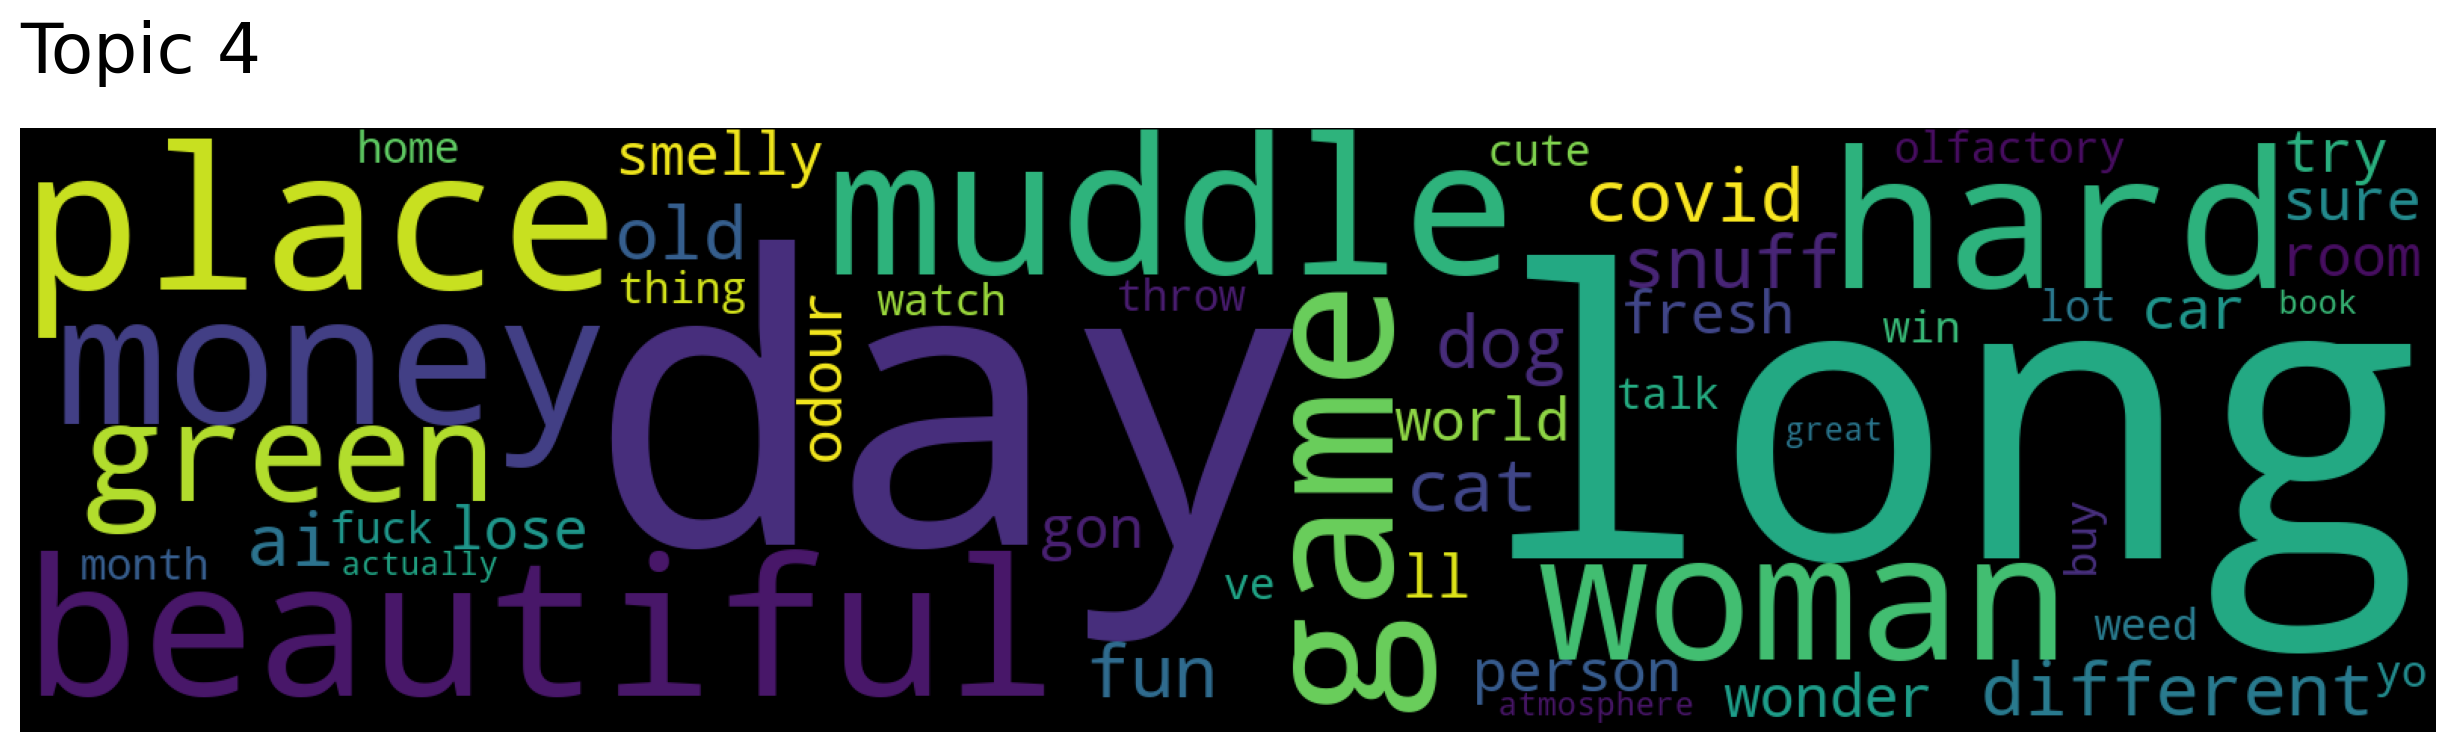

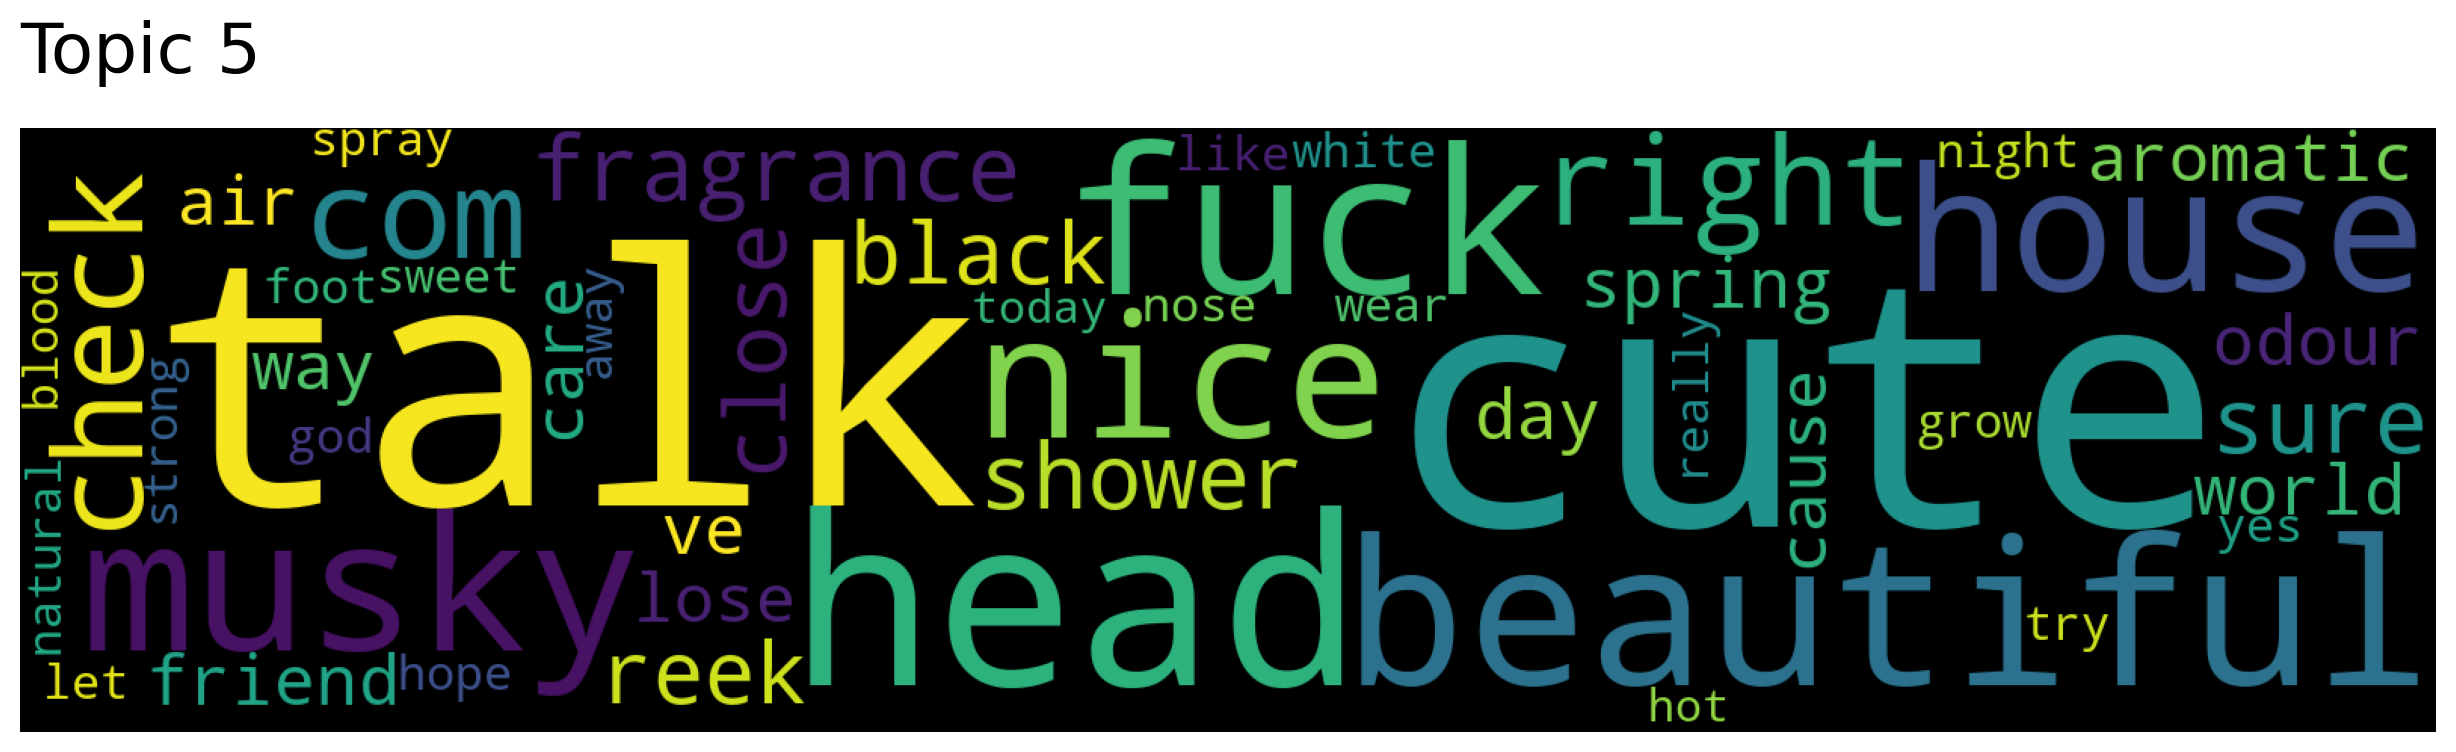

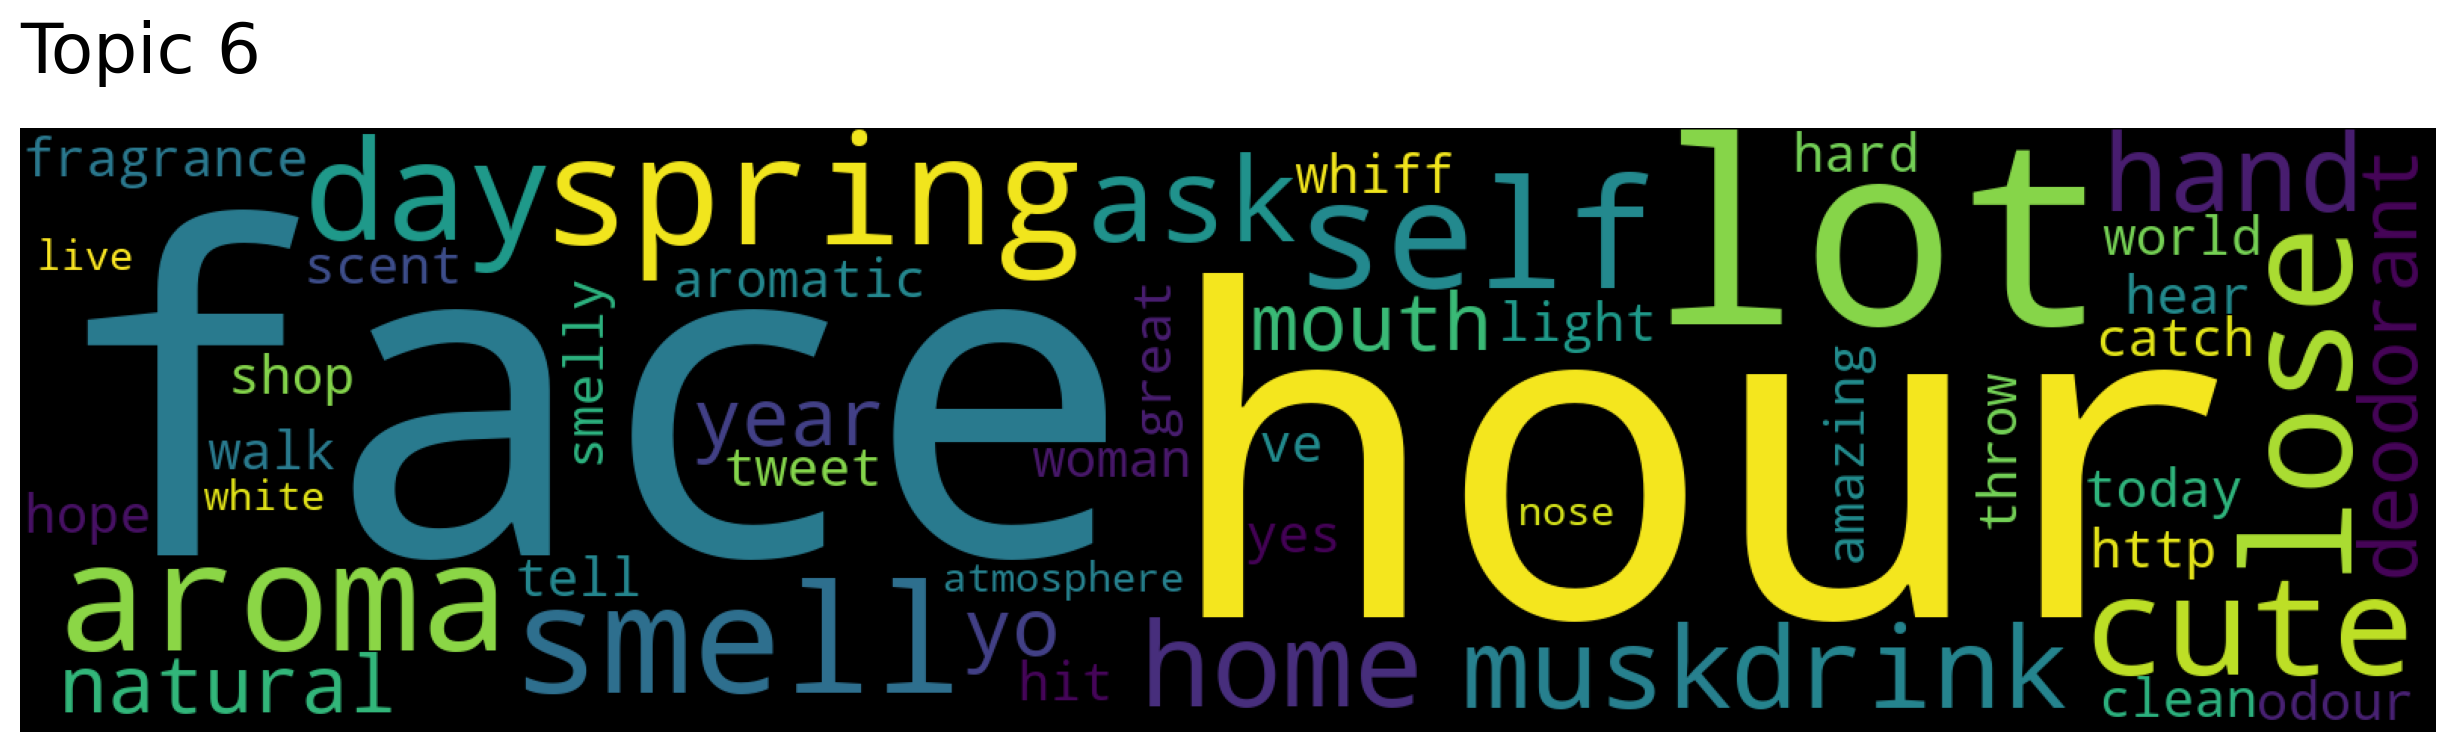

In [29]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)


In [37]:
topic_words, word_scores,topic_scores, topic_nums_2 = model.search_topics(keywords=['covid'], num_topics=model.get_num_topics())


In [40]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [41]:
topic_sizes

array([2590, 1652,  664,  562,  550,  544,  530], dtype=int64)

In [42]:
topic_nums

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

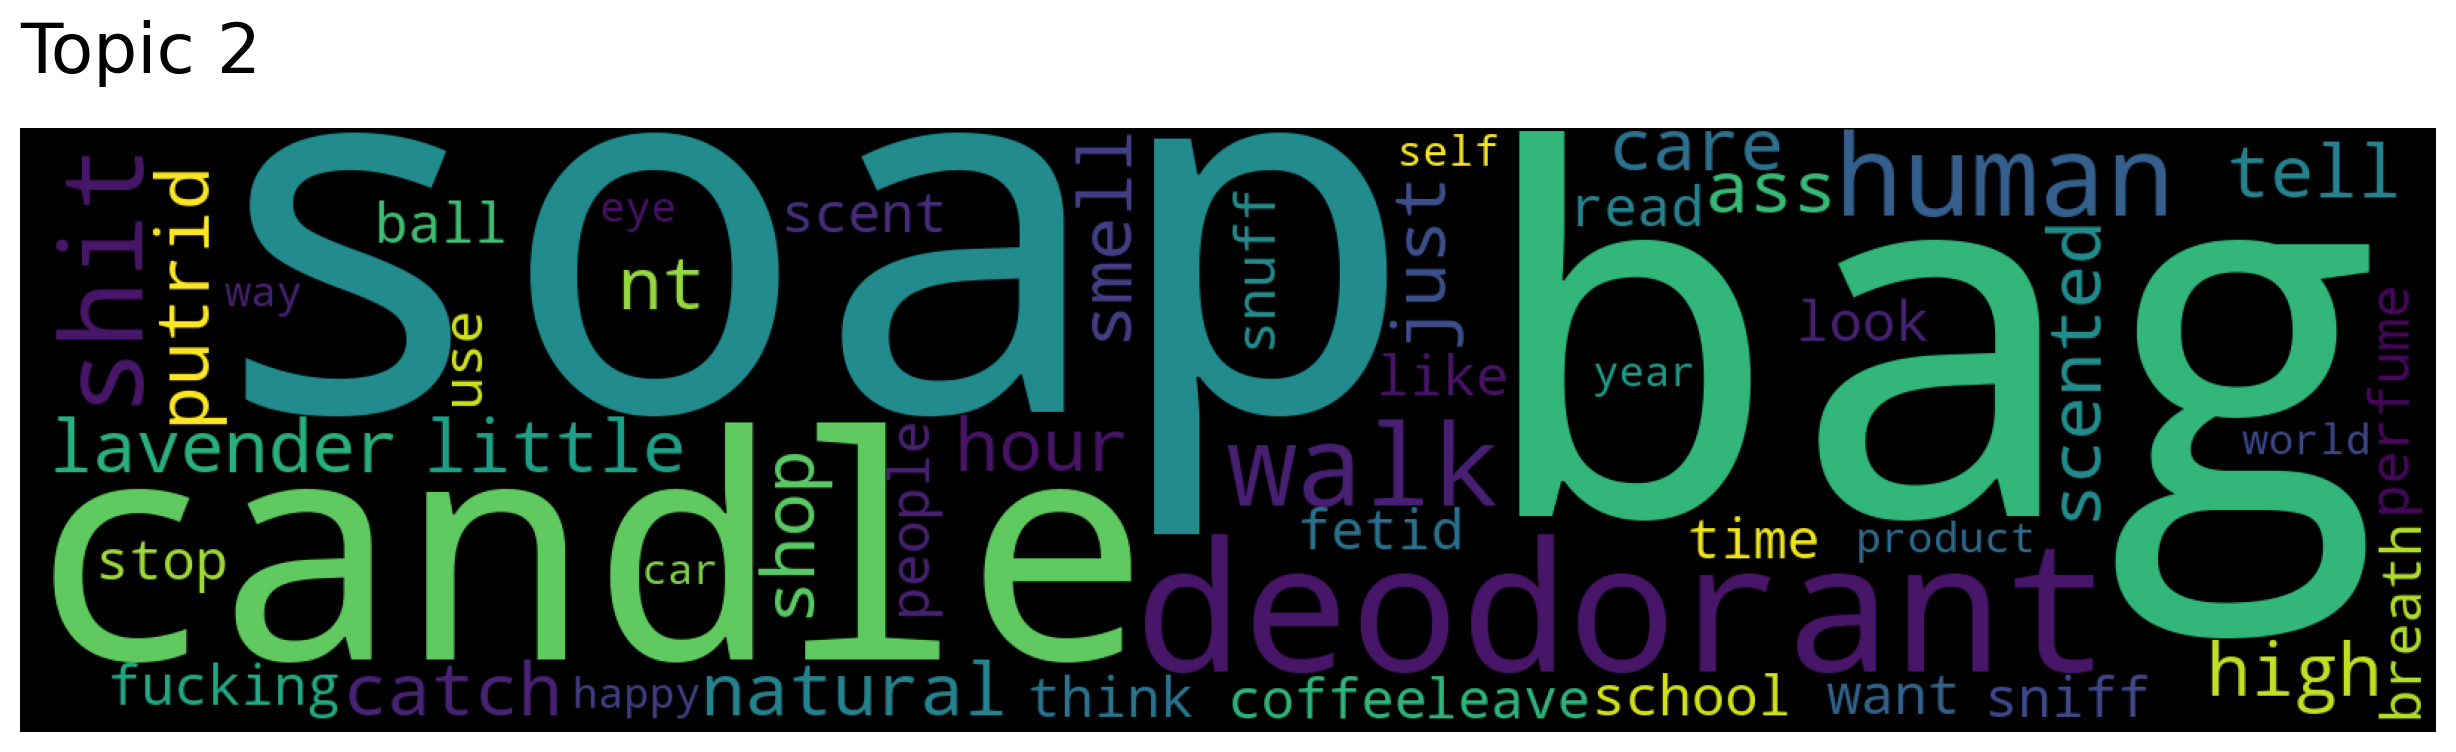

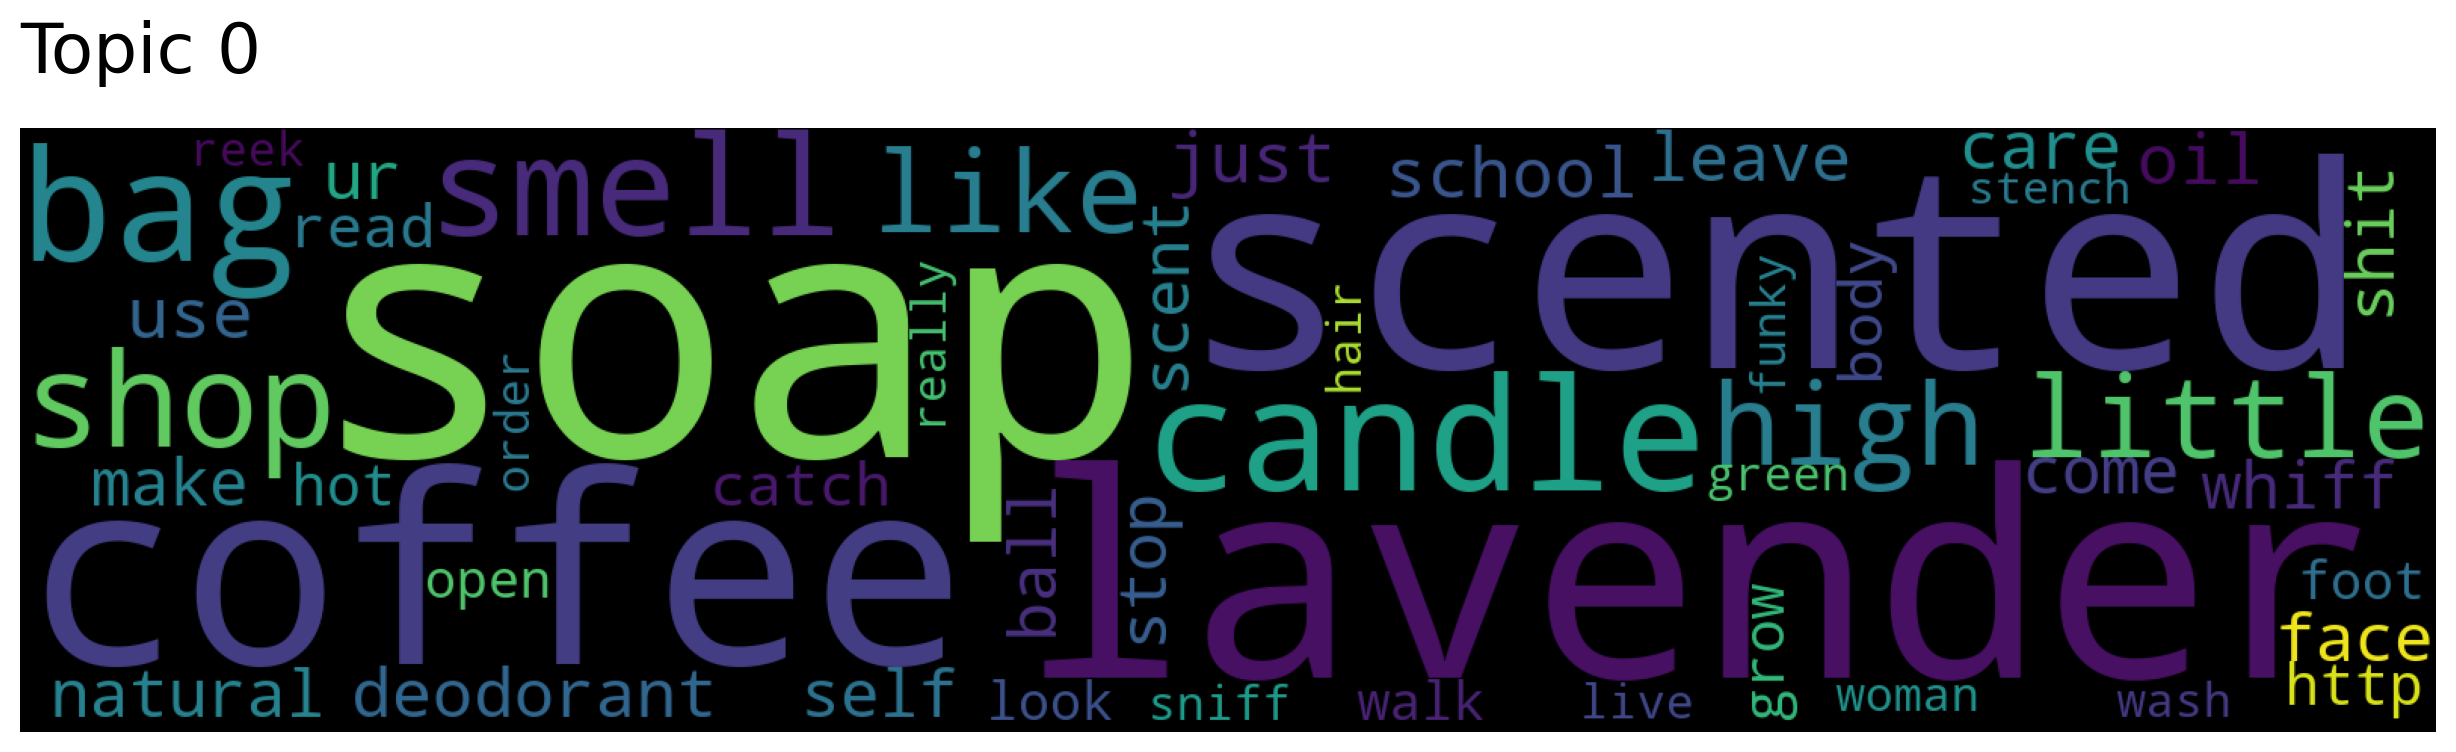

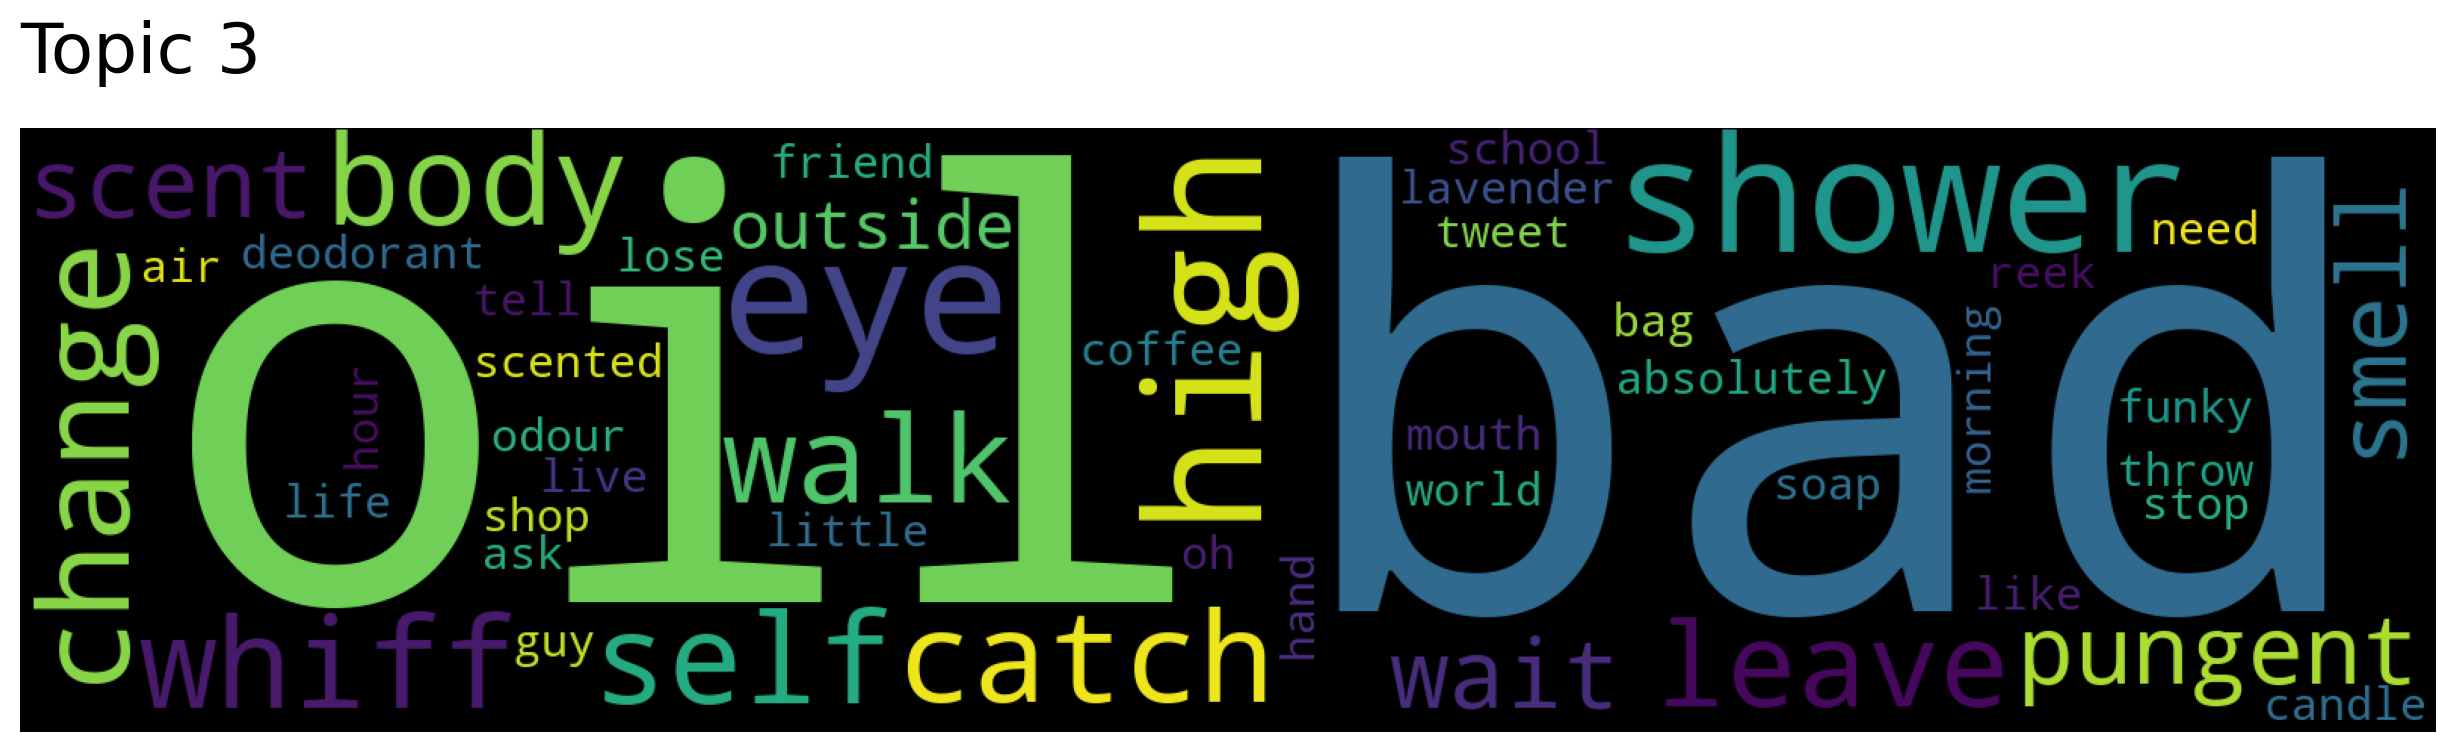

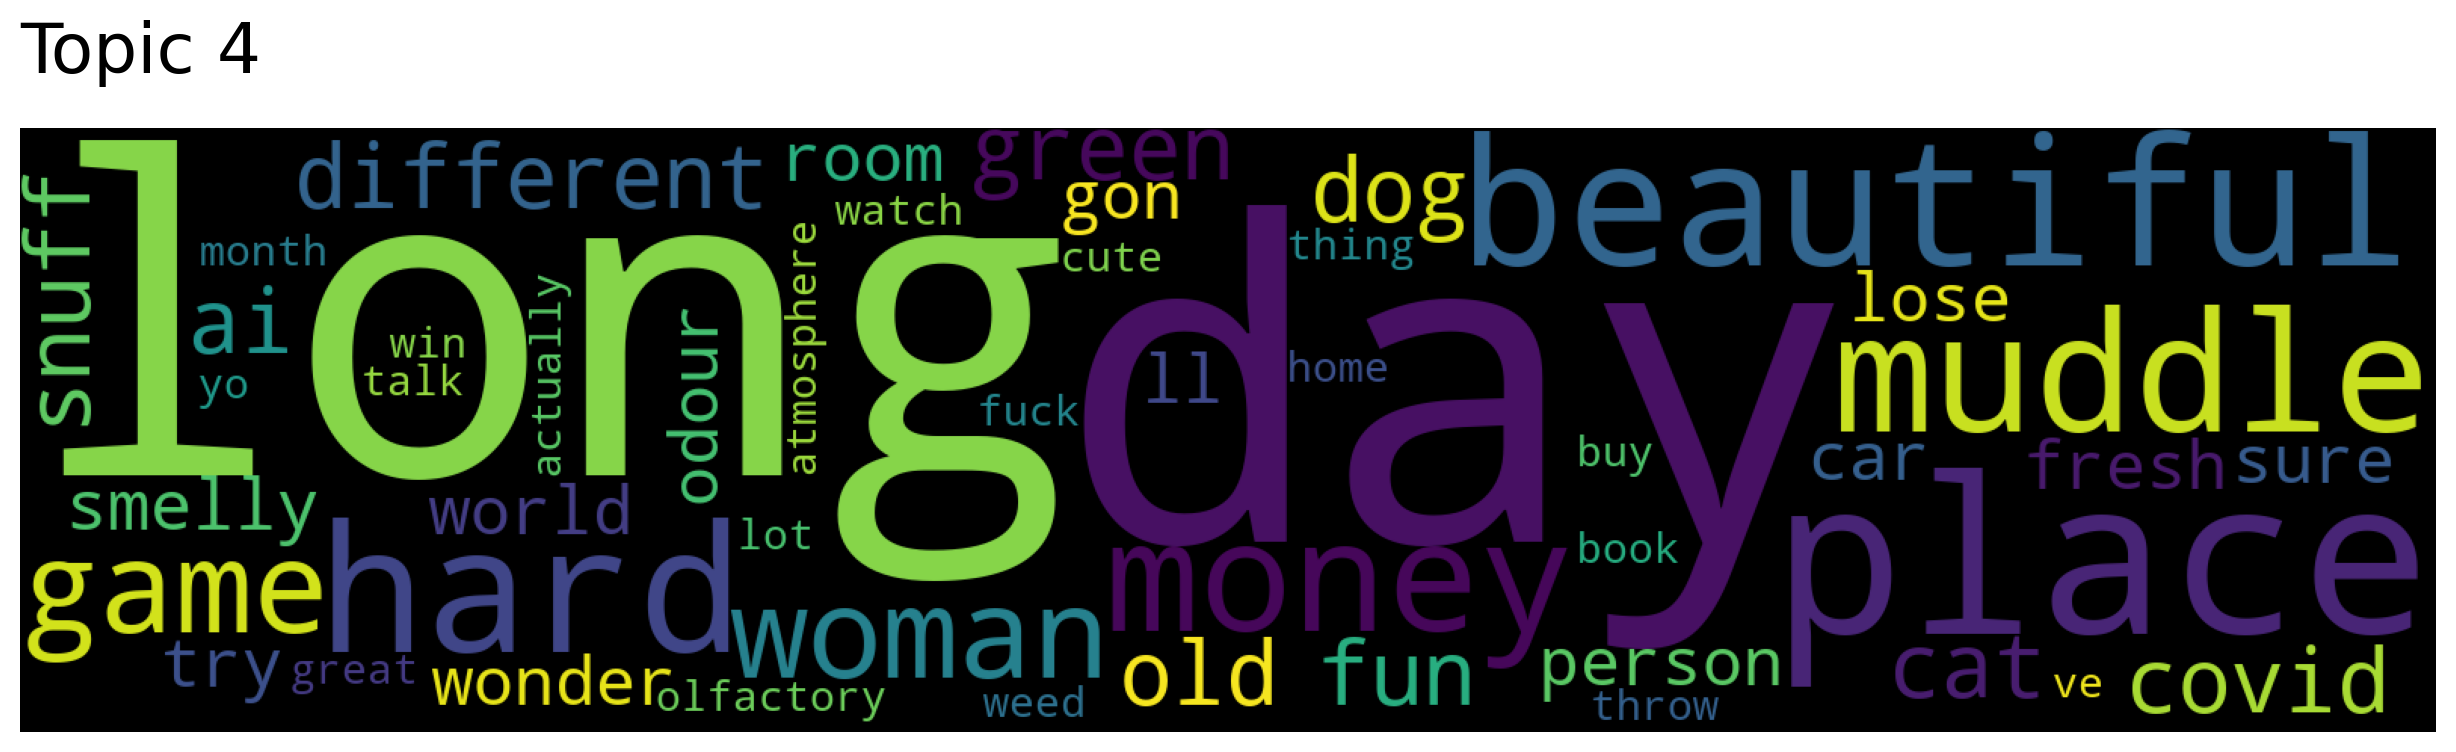

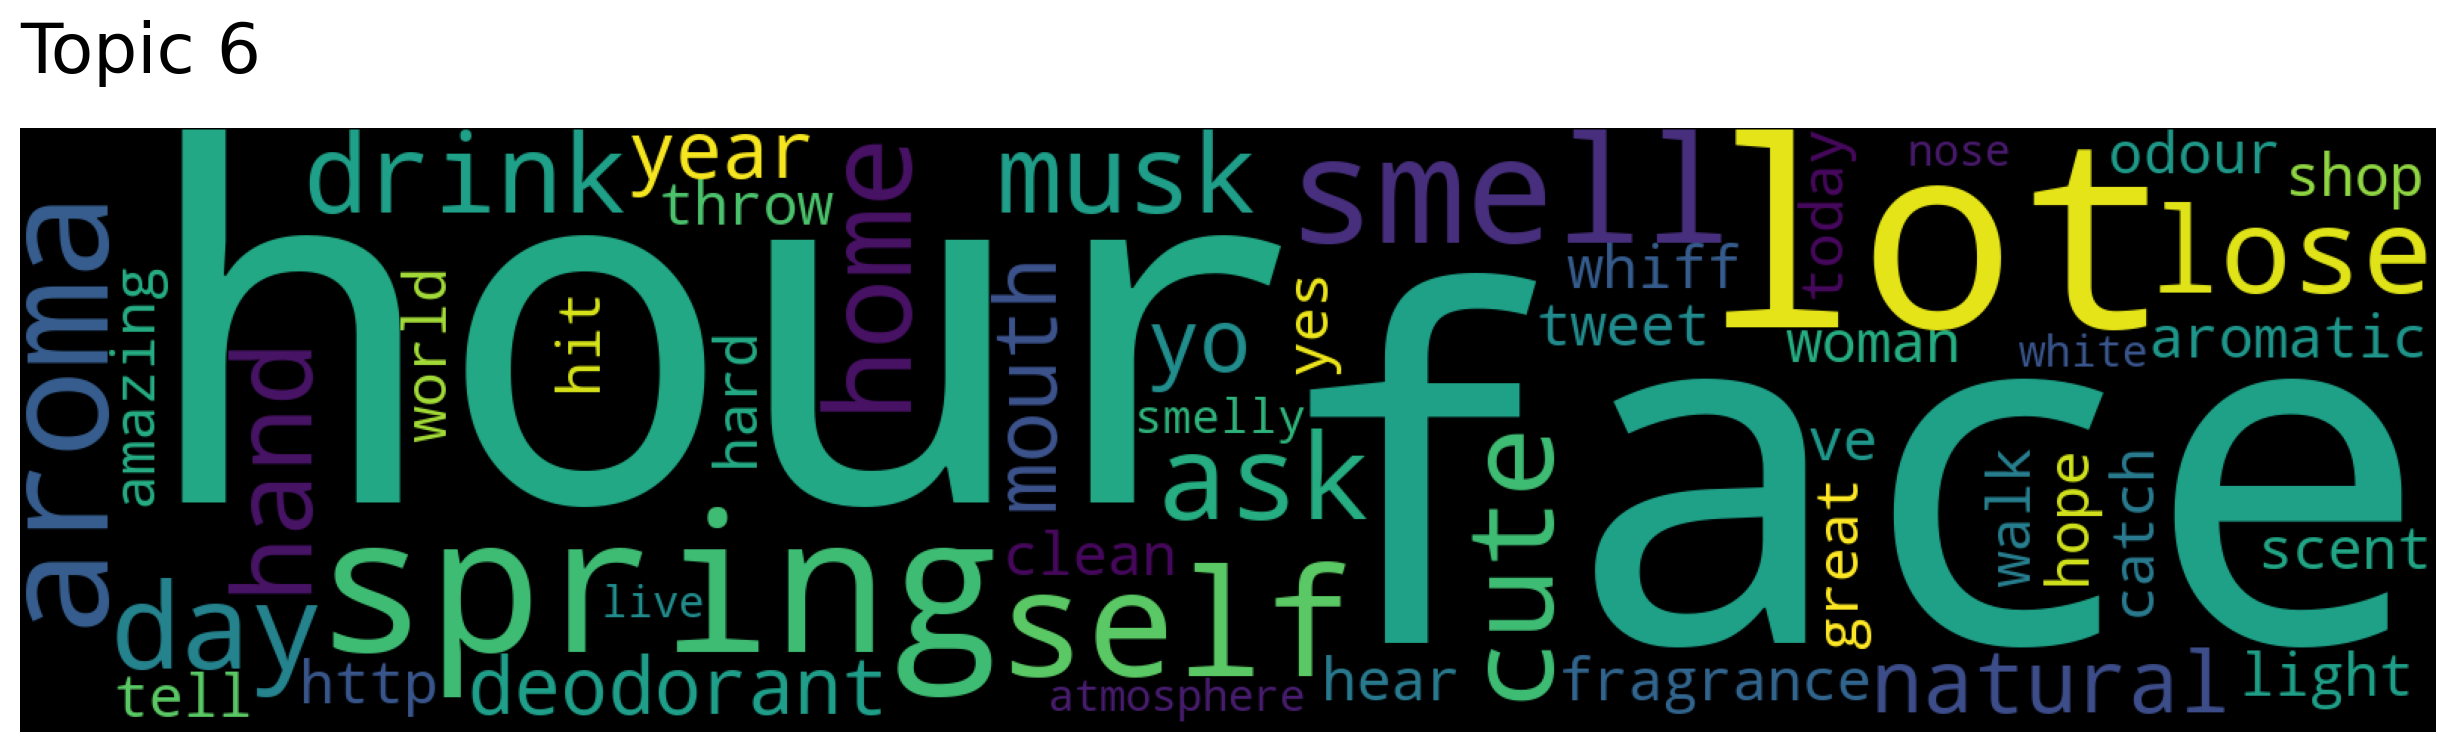

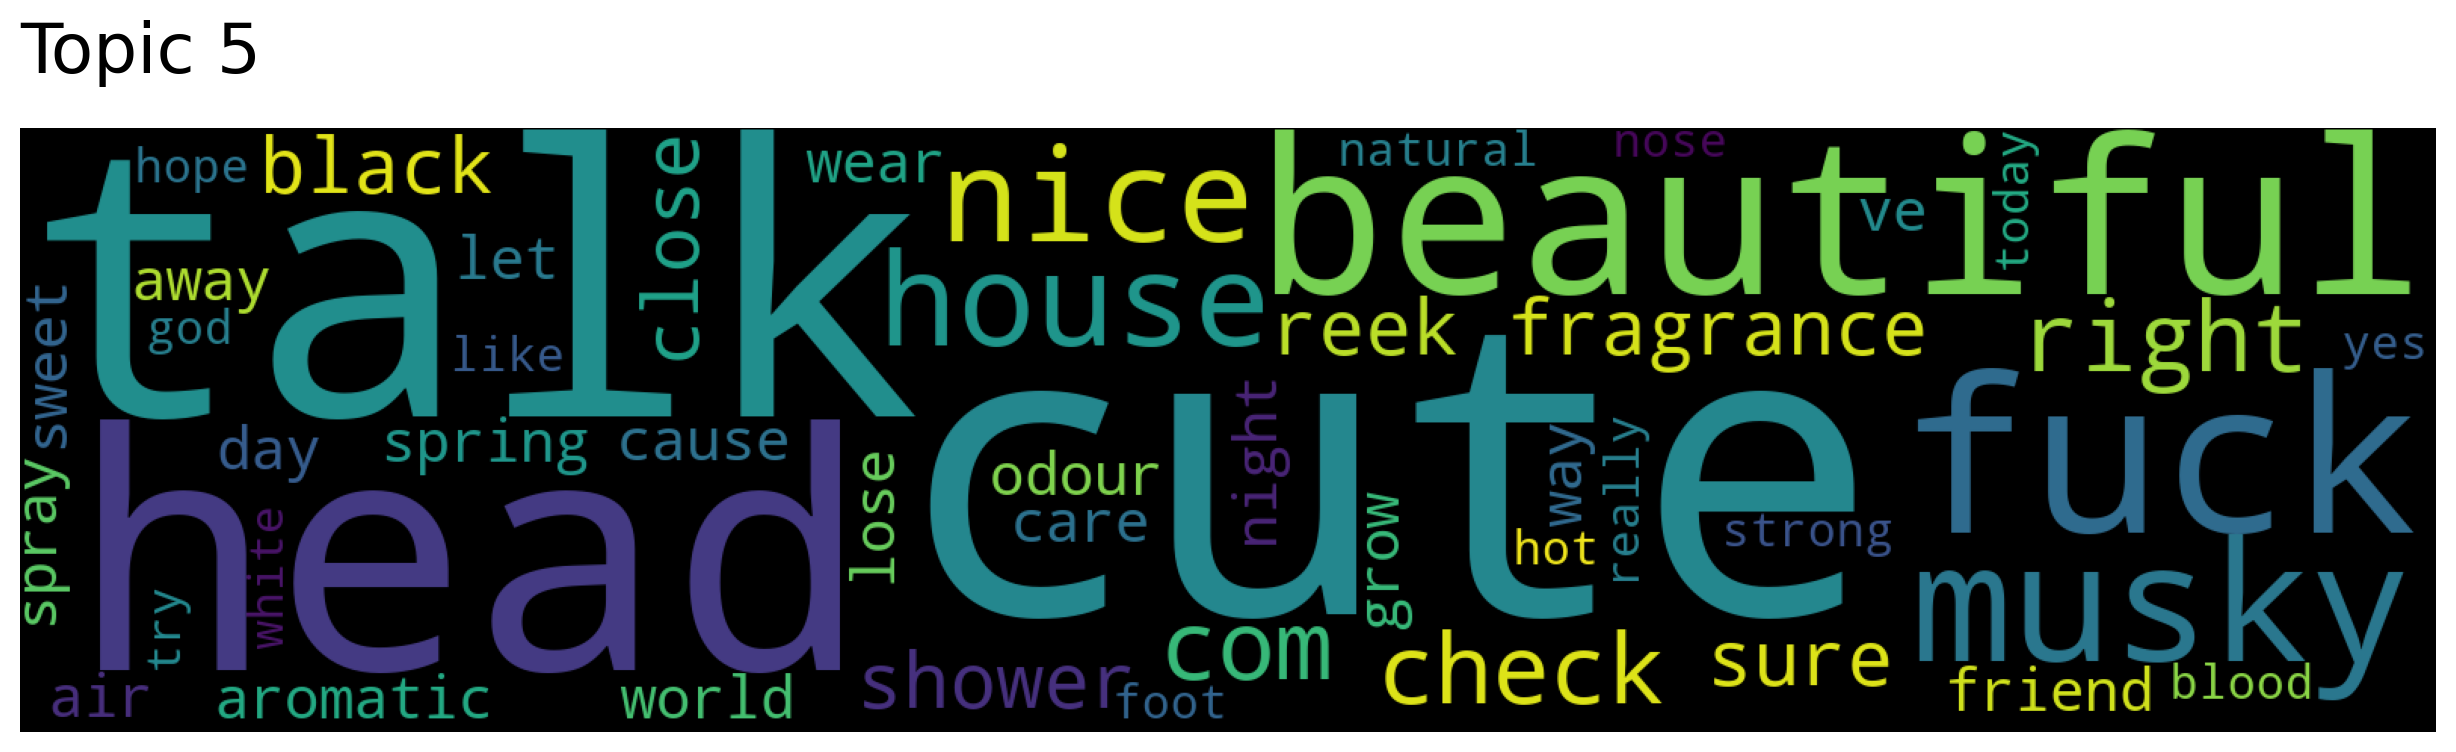

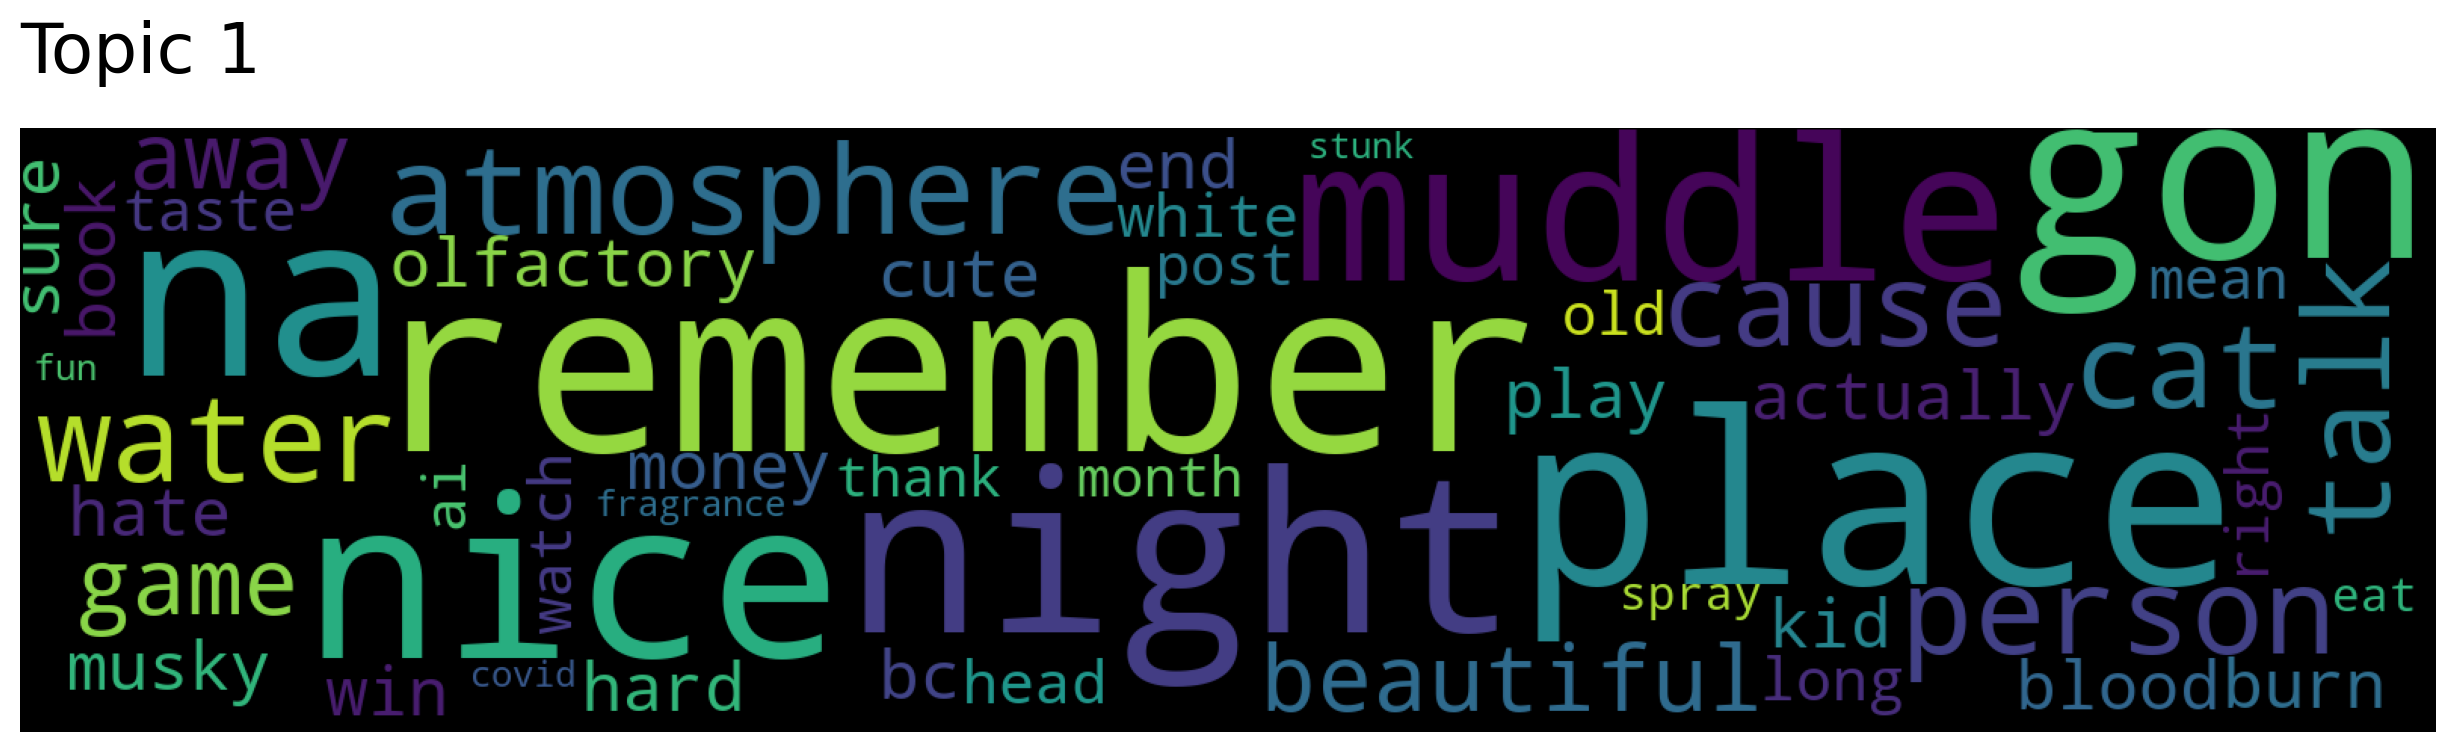

In [39]:
for topic in topic_nums_2:
    model.generate_topic_wordcloud(topic)


In [43]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=2, num_docs=5)
